In [1]:
import os
import random
import numpy as np
import imageio.v2 as imageio
import imgaug as ia
import imgaug.augmenters as iaa
%matplotlib inline

## Load and show a random image

In [67]:
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
import numpy as np

def show_images(images):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axis('off')
    ax.imshow(np.hstack(images), cmap='gray', alpha=1.0)
    ax.set_alpha(0.0)
    plt.show()

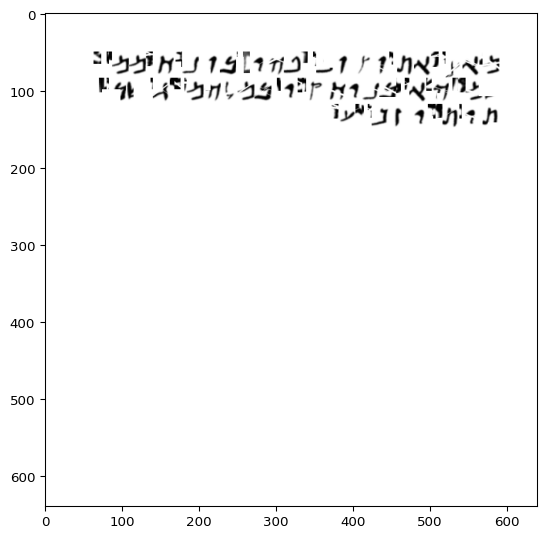

In [66]:
# choose a random directory and file
path = '../data/images/new'

# Filter the files that contain "crop" in the filename
filtered_files = [file for file in os.listdir(path) if "crop" in file]

# random_file = random.choice(filtered_files)
random_file = 'test.png'

# read and show image
img = imageio.imread(os.path.join(path, random_file))
ia.imshow(img)

Original image:


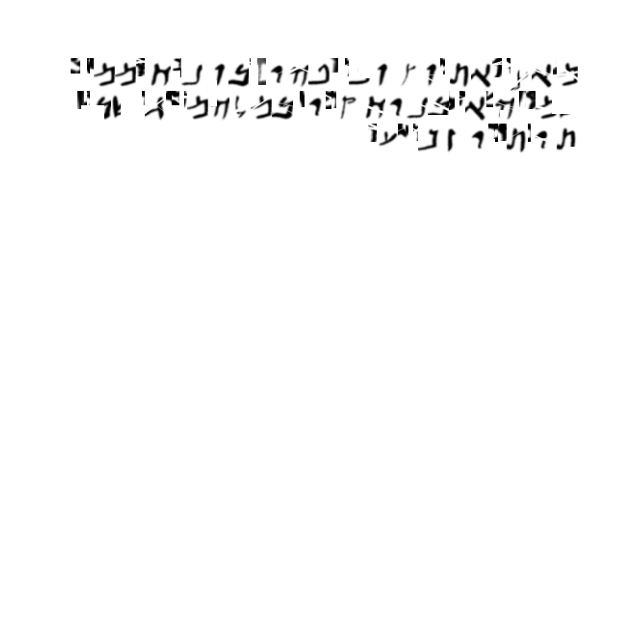

Augmented image:


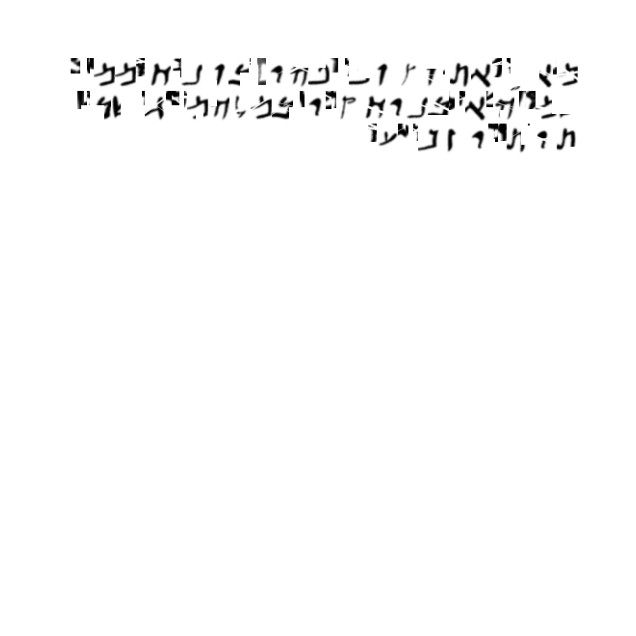

In [70]:
aug = iaa.Cutout(nb_iterations=(50, 100), size=(0.01, 0.05), squared=False,
                 fill_mode="constant", cval=255)

img_aug = aug(image=img)

print("Original image:")
# ia.imshow(img)
show_images([img])

print("Augmented image:")
# ia.imshow(img_aug)
show_images([img_aug])

In [83]:
# Set the dropout parameters
dropout_probability = 0.05  # Adjust as needed


def _augment_images(images, random_state, parents, hooks):
    result = []
    for image in images:
        mask = image == 0  # Create a mask for black pixels
        dropout_mask = random_state.random(mask.shape) < dropout_probability
        image[dropout_mask & mask] = 255  # Set black pixels to white
        result.append(image)
    return result

Original image:


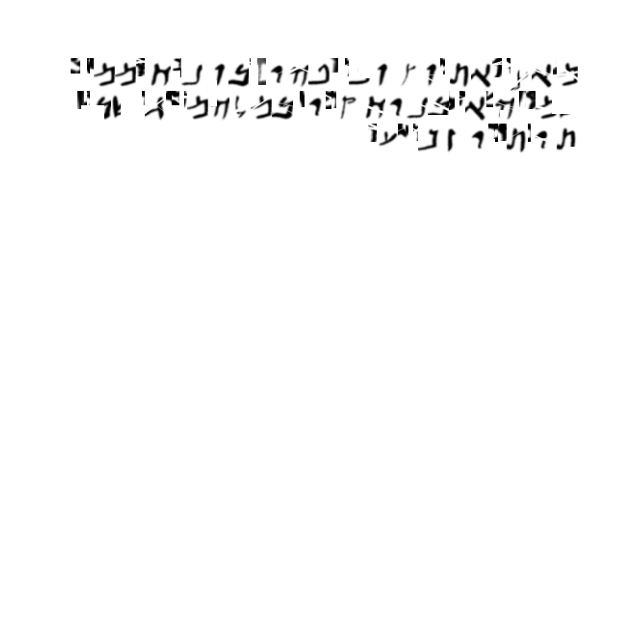

Augmented image:


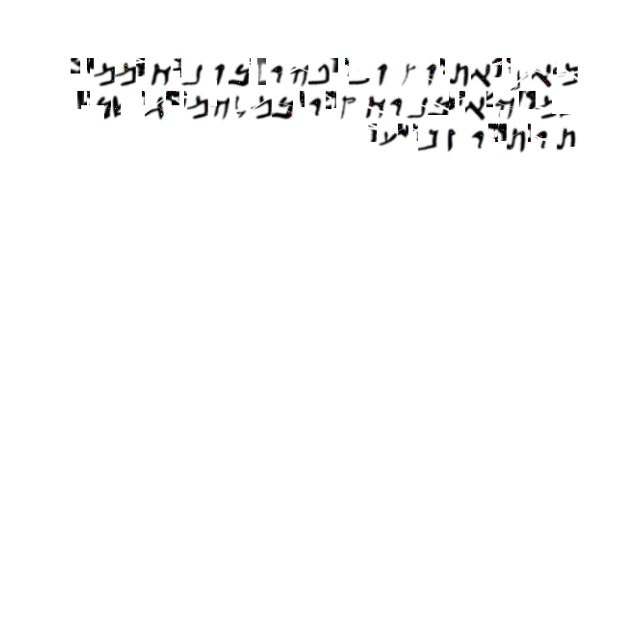

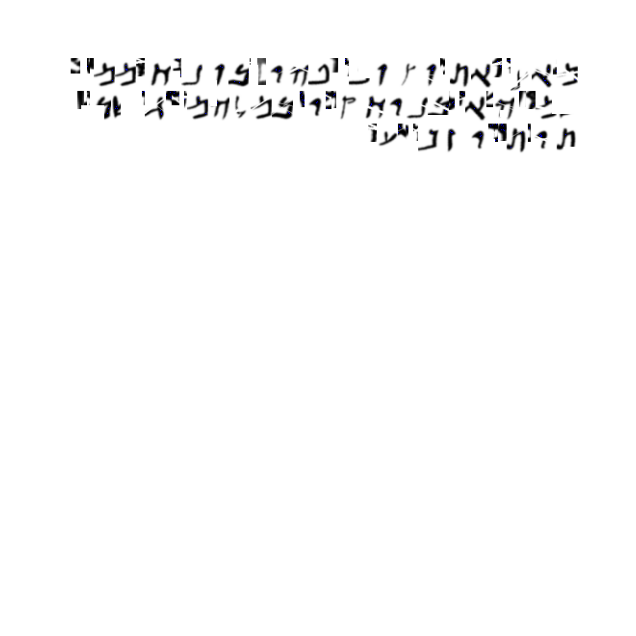

In [87]:
aug = iaa.Lambda(
    func_images=_augment_images,
)

img_aug2 = aug(image=img)

print("Original image:")
# ia.imshow(img)
show_images([img])

print("Augmented image:")
# ia.imshow(img_aug2)
show_images([img_aug2])

diff = highlight_differences(img, img_aug2)
show_images([diff])

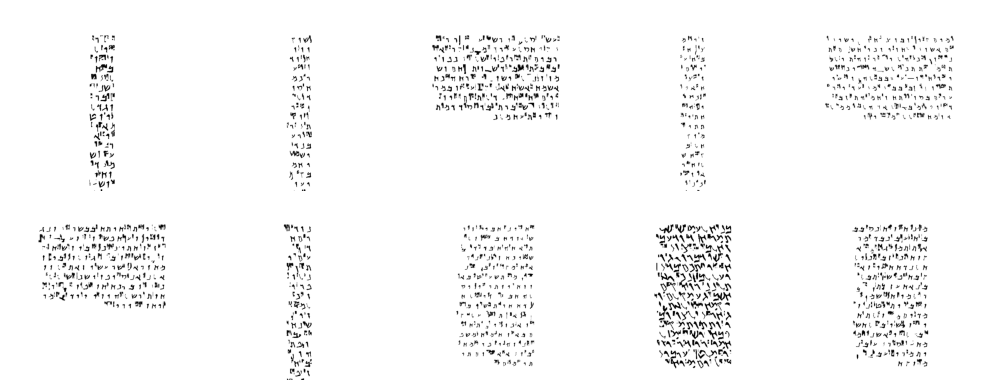

In [35]:
import matplotlib.pyplot as plt

# Read the images from the directory
path = '../data/images/train'
images = [imageio.imread(os.path.join(path, file)) for file in os.listdir(path) if file.startswith('sample') and 'crop' in file]

# Create a figure and axes
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# Iterate over the images and plot them
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [86]:
import cv2
import numpy as np

def highlight_differences(image1, image2, output_path=None):
    # Compute the absolute difference between the images
    diff = cv2.absdiff(image1, image2)

    # Create a copy of one image for highlighting the differences
    highlighted_img = image1.copy()

    # Find the differing pixels
    differing_pixels = np.where(diff > 0)

    # Highlight the differing pixels on the copied image
    for y, x in zip(differing_pixels[0], differing_pixels[1]):
        highlighted_img[y, x] = [0, 0, 255]  # Set the differing pixel color to red (BGR format)


    # Display the image with differences highlighted
    # combined = np.concatenate((highlighted_img, image2), axis=1)
    # cv2.imshow("Highlighted Differences", highlighted_img)
    # cv2.waitKey(0)

    # Save the output image with differences highlighted
    if output_path is not None:
        cv2.imwrite(output_path, highlighted_img)

    # Clean up
    # cv2.destroyAllWindows()

    return highlighted_img

# Example usage
# output_image_path = "highlighted_differences.png"
# highlight_differences(img, img_aug, output_image_path)
